# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results , mouse_metadata , on = "Mouse ID")
# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice
len(pd.unique(mouse_study["Mouse ID"]))


249

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].iloc[0]

'g989'

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study[mouse_study["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean = mouse_study.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mouse_study_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [17]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(mouse_study_clean["Mouse ID"]))

249

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = mouse_study_clean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median = mouse_study_clean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_variance = mouse_study_clean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_std = mouse_study_clean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem = mouse_study_clean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame(data = {"Mean Tumor Volume": tumor_mean , "Median Tumor Volume": tumor_median , "Tumor Volume Variance" : tumor_variance , 
                                 "Tumor Volume Std. Dev." : tumor_std , "Tumor Volume Std. Err." : tumor_sem})
summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
mouse_study_clean.groupby("Drug Regimen").agg(["mean", "median" , "var" , "std" , "sem"])["Tumor Volume (mm3)"]
# Using the aggregation method, produce the same summary statistics in a single line.


C:\Users\chris\AppData\Local\Temp\ipykernel_29488\2215896283.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  mouse_study_clean.groupby("Drug Regimen").agg(["mean", "median" , "var" , "std" , "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

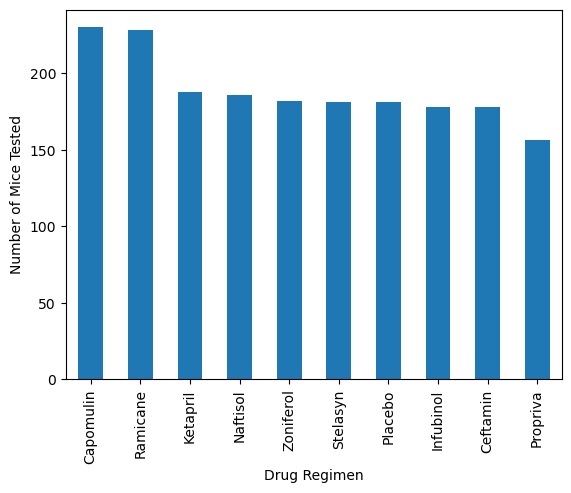

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mouse_study_clean["Drug Regimen"].value_counts().plot(kind="bar")
plt.xlabel("Drug Regimen"); plt.ylabel("Number of Mice Tested")

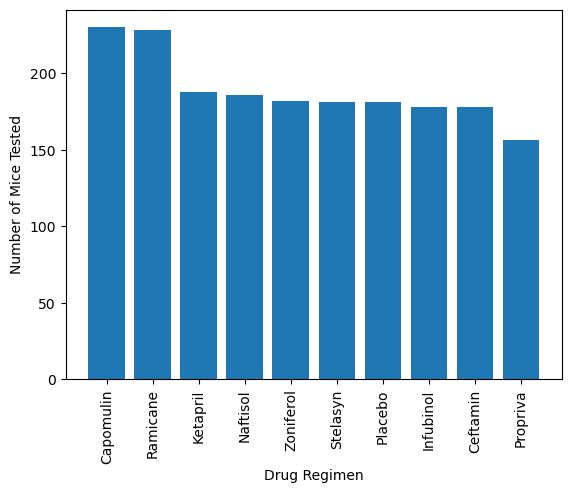

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
data =mouse_study_clean["Drug Regimen"].value_counts().to_dict()

plt.figure()
plt.bar(x = list(range(len(data))) ,height = data.values() , tick_label = list(data.keys()))
plt.xlabel("Drug Regimen"); plt.ylabel("Number of Mice Tested")
plt.xticks(rotation = 90)
plt.show()


<AxesSubplot:ylabel='Sex'>

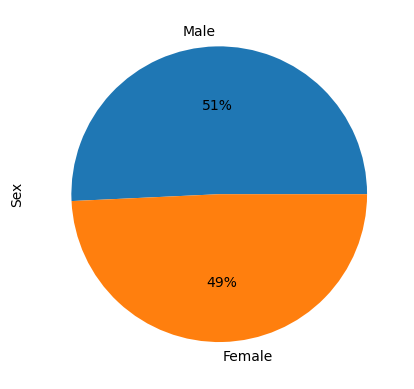

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_study_clean["Sex"].value_counts().plot(kind= "pie" , autopct  = "%1.0f%%")

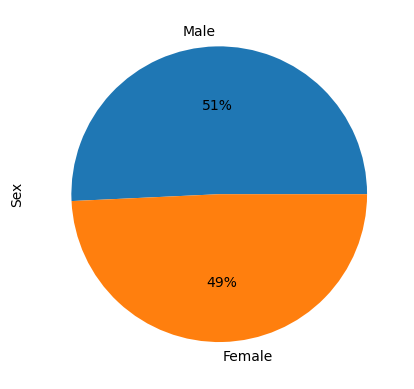

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data =mouse_study_clean["Sex"].value_counts().to_dict()

plt.figure()
plt.pie(data.values() , labels= list(data.keys()), autopct  = "%1.0f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_study_clean[["Mouse ID","Tumor Volume (mm3)"]].loc[mouse_study_clean.groupby("Mouse ID").idxmax()["Timepoint"].values]
last_timepoint.rename(inplace= True , columns={"Tumor Volume (mm3)": "Tumor Vol Last Timepoint"})
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_study_clean = mouse_study_clean.merge(last_timepoint , on = "Mouse ID")

C:\Users\chris\AppData\Local\Temp\ipykernel_29488\2269536483.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  last_timepoint = mouse_study_clean[["Mouse ID","Tumor Volume (mm3)"]].loc[mouse_study_clean.groupby("Mouse ID").idxmax()["Timepoint"].values]


In [83]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol",  "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [] 

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in drugs: 
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    data = mouse_study_clean[mouse_study_clean["Drug Regimen"] == name]["Tumor Vol Last Timepoint"]
    tumor_vol_data.append(data.to_numpy())
    
    # add subset 
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3 - q1 

   # q = data.quantile([0.25, 0.75])
  # IQR = q[1] -q[0]
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    # Determine outliers using upper and lower bounds
    #print(ub , lb, data.isin([lb, ub]))
    filter = (data > lb) & (data < ub)
    print(data[~filter])
   #print(name, "'s potential outliers: " , data[~data.isin([lb , ub])])


Series([], Name: Tumor Vol Last Timepoint, dtype: float64)
Series([], Name: Tumor Vol Last Timepoint, dtype: float64)
213    36.321346
214    36.321346
Name: Tumor Vol Last Timepoint, dtype: float64
1309    46.784535
1310    46.784535
1311    46.784535
1322    48.722078
1323    48.722078
1324    48.722078
1325    48.722078
1396    45.000000
1407    47.784682
1408    47.784682
1462    45.000000
1608    45.000000
1644    45.000000
Name: Tumor Vol Last Timepoint, dtype: float64


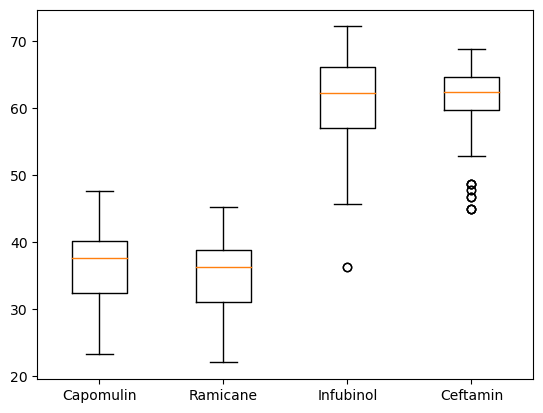

In [87]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data)
plt.xticks(ticks = list(range(1,len(drugs)+1)) , labels= drugs)
plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

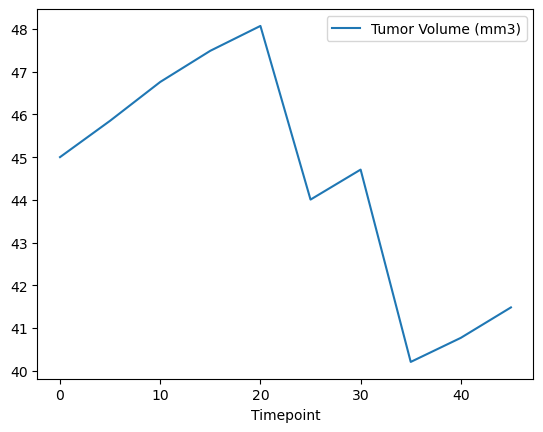

In [88]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_study_clean[mouse_study_clean["Mouse ID"]=="l509"].plot(x = "Timepoint", y= "Tumor Volume (mm3)")

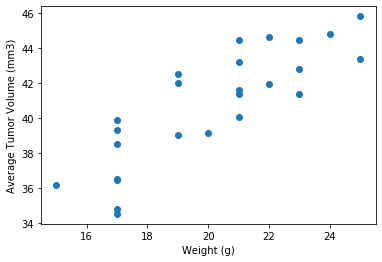

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


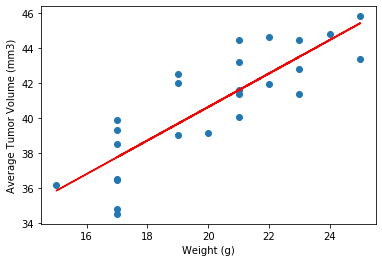

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

